# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state = 42)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [15]:
type(X_train_tsne)

numpy.ndarray

Постройте диаграмму рассеяния на этих данных.

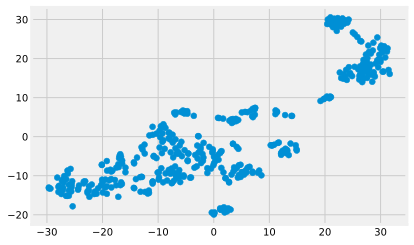

In [24]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42

In [26]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter = 100, random_state=42)

In [70]:
train_labels = model.fit_predict(X_train)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

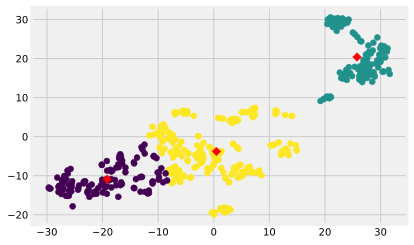

In [33]:
centers = model.cluster_centers_

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

Вычислите средние значения price и CRIM в разных кластерах.

In [35]:
y_train[train_labels == 0].mean()

price    26.213514
dtype: float64

In [36]:
y_train[train_labels == 1].mean()

price    16.277228
dtype: float64

In [37]:
y_train[train_labels == 2].mean()

price    24.250521
dtype: float64

In [50]:
X_train['CRIM'][train_labels == 0].mean

<bound method Series.mean of 332    0.03466
325    0.19186
56     0.02055
238    0.08244
244    0.20608
250    0.14030
42     0.14150
347    0.01870
329    0.06724
57     0.01432
194    0.01439
298    0.06466
66     0.04379
5      0.02985
45     0.17142
3      0.03237
60     0.14932
192    0.08664
272    0.11460
67     0.05789
193    0.02187
249    0.19073
304    0.05515
83     0.03551
248    0.16439
199    0.03150
74     0.07896
253    0.36894
284    0.00906
302    0.09266
        ...   
251    0.21409
303    0.10000
350    0.06211
201    0.03445
43     0.15936
190    0.09068
53     0.04981
80     0.04113
205    0.13642
52     0.05360
345    0.03113
241    0.10612
328    0.06617
306    0.07503
243    0.12757
54     0.01360
50     0.08873
189    0.08370
187    0.07875
58     0.15445
344    0.03049
252    0.08221
191    0.06911
293    0.08265
343    0.02543
330    0.04544
188    0.12579
71     0.15876
270    0.29916
348    0.01501
Name: CRIM, Length: 111, dtype: float64>

In [51]:
X_train['CRIM'][train_labels == 1].mean

<bound method Series.mean of 477    15.02340
423     7.05042
437    15.17720
409    14.43830
434    13.91340
418    73.53410
432     6.44405
404    41.52920
441     9.72418
433     5.58107
447     9.92485
468    15.57570
360     4.54192
405    67.92080
478    10.23300
472     3.56868
373    11.10810
383     7.99248
356     8.98296
450     6.71772
369     5.66998
361     3.83684
394    13.35980
400    25.04610
420    11.08740
455     4.75237
483     2.81838
357     3.84970
403    24.80170
386    24.39380
         ...   
469    13.07510
379    17.86670
465     3.16360
407    11.95110
439     9.39063
462     6.65492
464     7.83932
401    14.23620
389     8.15174
446     6.28807
419    11.81230
430     8.49213
427    37.66190
366     3.69695
479    14.33370
387    22.59710
486     5.69175
363     4.22239
461     3.69311
445    10.67180
463     5.82115
459     6.80117
443     9.96654
385    16.81180
413    28.65580
359     4.26131
372     8.26725
458     7.75223
466     3.77498
435    11.1

In [71]:
X_train['CRIM'][train_labels == 2].mean

<bound method Series.mean of 423     7.05042
437    15.17720
409    14.43830
434    13.91340
418    73.53410
155     3.53501
432     6.44405
433     5.58107
450     6.71772
455     4.75237
428     7.36711
410    51.13580
424     8.79212
438    13.67810
457     8.20058
415    18.08460
367    13.52220
425    15.86030
416    10.83420
431    10.06230
426    12.24720
429     9.33889
156     2.44668
419    11.81230
430     8.49213
427    37.66190
445    10.67180
413    28.65580
466     3.77498
435    11.16040
102     0.22876
Name: CRIM, dtype: float64>

* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [54]:
test_labels = model.fit_predict(X_test)

In [55]:
y_test[test_labels == 0].mean()

price    23.911594
dtype: float64

In [56]:
y_test[test_labels == 1].mean()

price    17.392308
dtype: float64

In [57]:
y_test[test_labels == 2].mean()

price    12.814286
dtype: float64

In [60]:
X_test['CRIM'][test_labels == 0].mean

<bound method Series.mean of 173    0.09178
274    0.05644
72     0.09164
76     0.10153
316    0.31827
140    0.29090
500    0.22438
218    0.11069
9      0.17004
78     0.05646
323    0.28392
124    0.09849
195    0.01381
271    0.16211
278    0.07978
30     1.13081
501    0.06263
79     0.08387
210    0.17446
497    0.26838
172    0.13914
320    0.16760
153    2.14918
2      0.02729
336    0.03427
208    0.13587
73     0.19539
496    0.28960
307    0.04932
204    0.02009
        ...   
268    0.54050
290    0.03502
84     0.05059
245    0.19133
63     0.12650
55     0.01311
229    0.44178
18     0.80271
351    0.07950
209    0.43571
82     0.03659
39     0.02763
46     0.18836
355    0.10659
77     0.08707
104    0.13960
203    0.03510
69     0.12816
255    0.03548
312    0.26169
234    0.44791
324    0.34109
93     0.02875
137    0.35233
176    0.07022
131    1.19294
346    0.06162
132    0.59005
86     0.05188
75     0.09512
Name: CRIM, Length: 69, dtype: float64>

In [61]:
X_test['CRIM'][test_labels == 1].mean

<bound method Series.mean of 491     0.10574
452     5.09017
471     4.03841
473     4.64689
388    14.33370
448     9.32909
421     7.02259
474     8.05579
375    19.60910
362     3.67822
467     4.42228
390     6.96215
470     4.34879
485     3.67367
442     5.66637
395     8.71675
481     5.70818
444    12.80230
398    38.35180
381    15.87440
489     0.18337
408     7.40389
392    11.57790
460     4.81213
365     4.55587
371     9.23230
Name: CRIM, dtype: float64>

In [62]:
X_test['CRIM'][test_labels == 2].mean

<bound method Series.mean of 414    45.74610
454     9.51363
456     4.66883
417    25.94060
412    18.81100
436    14.42080
411    14.05070
Name: CRIM, dtype: float64>